In [2]:
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Cargamos los archivos que veniamos usando
datos_censales_con_gdf = gdp.read_file("../data/processed/datos_censales_con_gdf.gpkg")

# Análisis de Limitaciones NBI

Repasamos las definiciones usadas por el INDEC:

De **NBI** se consideran hogares con Necesidades básicas Insatisfechas aquellos en los cuales está presente al menos uno de los siguientes indicadores de privación:

- **NBI Vivienda**: son los hogares que viven en habitaciones de inquilinato, hotel o pensión, viviendas no destinadas a fines habitacionales, viviendas precarias y otro tipo de vivienda. Se excluye a las viviendas tipo casa, departamento y rancho.
- **NBI Condiciones sanitarias**: incluye a los hogares que no poseen retrete
- **NBI Hacinamiento**: es la relación entre la cantidad total de miembros del hogar y la cantidad de habitaciones de uso exclusivo del hogar. Operacionalmente se considera que existe hacinamiento crítico cuando en el hogar hay más de tres personas por cuarto.
- **NBI Escolaridad**: hogares que tienen al menos un niño en edad escolar (6 a 12 años) que no asiste a la escuela.
- **NBI Capacidad de subsistencia**: incluye a los hogares que tienen cuatro o más personas por miembro ocupado y tienen un jefe que no ha completado el tercer grado de escolaridad primaria.

Vamos a estudiar las posibles limitaciones de este indicador **NBI** para medir condiciones de vida de la población.


-----------------------

### 1. Recálculo de NBI Vivienda

En este primer planteo, vamos a recalcular NBI vivienda, pero considerando las viviendas tipo RANCHO como viviendas inadecuadas.

#### Agregamos viviendas tipo 'Rancho'

> Supuesto 1:  **Error de clasificación censal**:--

Según la definición de vivienda tipo Rancho (1), estas viviendas en zonas urbanas no deberían existir, por lo que se infiere que fueron mal clasificadas. Asumimos que deberían haberse registrado como viviendas precarias, y por tanto, deberian formar parte del calculo de NBI Vivienda (2).


(1) Rancho: vivienda con salida directa al exterior (sus habitantes no pasan por pasillos o corredores
de uso común). Generalmente tiene paredes de adobe, piso de tierra y techo de chapa o paja. Es
característica de áreas rurales.

(2) NBI Vivienda: son los hogares que viven en habitaciones de inquilinato, hotel o pensión, viviendas no destinadas a fi nes habitacionales, viviendas precarias y otro tipo de vivienda. Se excluye a las viviendas tipo casa, departamento y rancho.


In [6]:
#Vemos los radios censales con mayor porcentaje de hogares con 'NBI_Vivienda'

porcentajes_nbi_vivienda = datos_censales_con_gdf['tasa_NBI_vivienda_%'].sort_values(ascending=False)
porcentajes_nbi_vivienda.head(10)  #Con esto definimos la escala de colores

362     18.791946
1312    17.532468
623     15.300546
846     15.246637
1316    14.767932
848     14.678899
589     14.534884
1166    13.870968
1375    13.829787
503     13.372093
Name: tasa_NBI_vivienda_%, dtype: float64

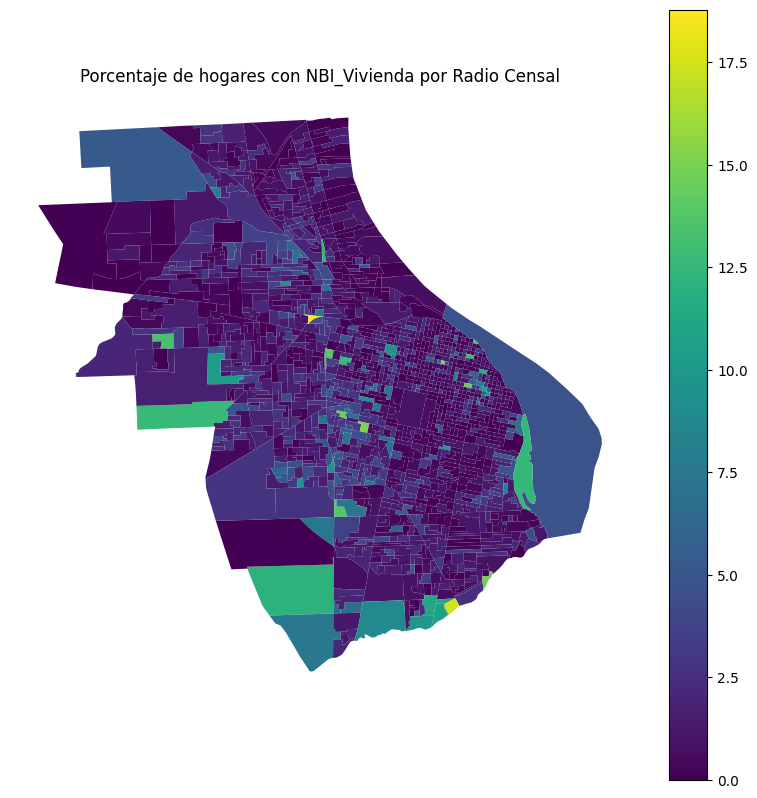

In [7]:
# Graficamos tasa_NBI_Vivienda_% por radio censale

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

datos_censales_con_gdf.plot(
    column="tasa_NBI_vivienda_%", 
    cmap="viridis", 
    legend=True,
    ax=ax,
    #Limitamos escala de colores
    vmin = 0,
    vmax = 18.791946    
)

plt.title("Porcentaje de hogares con NBI_Vivienda por Radio Censal")
ax.axis('off')
plt.show()

Ahora recalculamos el NBI Vivienda nuevamente en base a los supuesto planteados anteriormente.

In [8]:
datos_censales_con_gdf.columns

Index(['NOMPROV', 'PROV', 'NOMDEPTO', 'DEPTO', 'FRAC', 'RADIO', 'TIPO', 'LINK',
       'OBS2020', 'CodigoFraccion', 'CodigoRadioCensal', 'NBI_Hacinamiento_Si',
       'NBI_Hacinamiento_No', 'NBI_Vivienda_Si', 'NBI_Vivienda_No',
       'NBI_Sanitarias_Si', 'NBI_Sanitarias_No', 'NBI_Escolaridad_Si',
       'NBI_Escolaridad_No', 'NBI_Subsistencia_Si', 'NBI_Subsistencia_No',
       'NBI_Si', 'NBI_No', 'Sin_IPMH', 'IPMH_Solo_Recursos_Corrientes',
       'IPMH_Solo_Recursos_Patrimoniales', 'IPMH_Convergente', 'Total_Hogares',
       'Total_Poblacion', 'hogares_en_casa_a', 'hogares_en_casa_b',
       'hogares_en_rancho', 'hogares_en_casilla', 'hogares_en_departamento',
       'hogares_en_pieza_inquilinato', 'hogares_en_local_no_hab',
       'hogares_en_vivienda_movil', 'viv_casa_a', 'viv_casa_b', 'viv_rancho',
       'viv_casilla', 'viv_departamento', 'viv_pieza_inquilinato',
       'viv_local_no_hab', 'viv_vivienda_movil', 'Total_Viviendas',
       'tasa_NBI_%', 'NBI_Si_tasa_categorizado', '

In [9]:
# Recalculamos el TOTAL de hogares con NBI_Vivienda
datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO'] = (
    datos_censales_con_gdf['NBI_Vivienda_Si'] +
    datos_censales_con_gdf['hogares_en_rancho'] #Ahora si recalculamos en base a los hogares en ranchos
)

# Calculamos la nueva tasa de NBI_Vivienda ajustado
datos_censales_con_gdf['tasa_NBI_vivienda_%_AJUSTADO'] = (
    datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO'] /
    datos_censales_con_gdf['Total_Hogares'] * 100
)

In [72]:
# Alguna tablita visual aca.... de los por ejemplo, lugares con mas ranchos....

In [10]:
#Vemos los radios censales con mayor porcentaje de hogares con 'NBI_Vivienda'

porcentajes_nbi_vivienda = datos_censales_con_gdf['tasa_NBI_vivienda_%_AJUSTADO'].sort_values(ascending=False)
porcentajes_nbi_vivienda.head(10)  #Con esto definimos la escala de colores

1316    32.911392
98      32.903226
1459    29.007634
362     26.845638
783     26.760563
1166    25.161290
237     24.839400
1219    24.584718
104     22.909091
1222    21.933086
Name: tasa_NBI_vivienda_%_AJUSTADO, dtype: float64

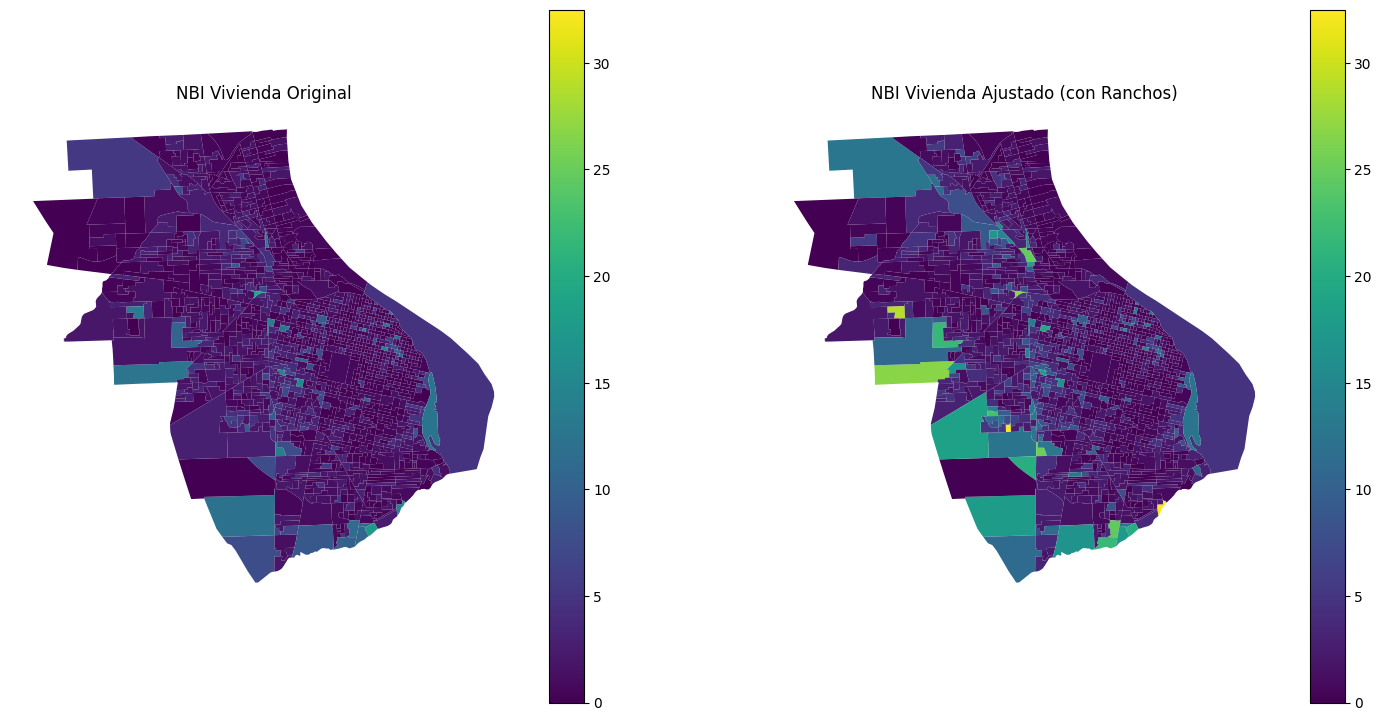

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

datos_censales_con_gdf.plot(
    column='tasa_NBI_vivienda_%',
    cmap='viridis', legend=True, ax=axes[0],
    vmin=0, vmax=32.489451
)
axes[0].set_title("NBI Vivienda Original")
axes[0].axis('off')

datos_censales_con_gdf.plot(
    column='tasa_NBI_vivienda_%_AJUSTADO',
    cmap='viridis', legend=True, ax=axes[1],
    vmin=0, vmax=32.489451
)
axes[1].set_title("NBI Vivienda Ajustado (con Ranchos)")
axes[1].axis('off')

plt.show()

Podemos calcular cuanto varió en NBI_Vivienda en cada radio censale (en porcentaje)

,CodigoRadioCensal,NBI_Vivienda_Si,viv_rancho,hogares_en_rancho,NBI_Vivienda_Si_AJUSTADO,Total_Hogares,tasa_NBI_vivienda_%,tasa_NBI_vivienda_%_AJUSTADO,delta_NBI_vivienda_%
98,820844914,30,69,72,102,310,9.677419,32.903226,23.225806
237,820840811,21,92,95,116,467,4.496788,24.839400,20.342612
104,820844920,12,49,51,63,275,4.363636,22.909091,18.545455
1316,820845529,35,42,43,78,237,14.767932,32.911392,18.143460
1178,820844901,4,22,22,26,140,2.857143,18.571429,15.714286
1459,820848418,35,41,41,76,262,13.358779,29.007634,15.648855
783,820843315,18,20,20,38,142,12.676056,26.760563,14.084507
250,820840907,10,29,29,39,208,4.807692,18.750000,13.942308
1219,820845204,34,39,40,74,301,11.295681,24.584718,13.289037
1169,820844827,13,22,23,36,176,7.386364,20.454545,13.068182


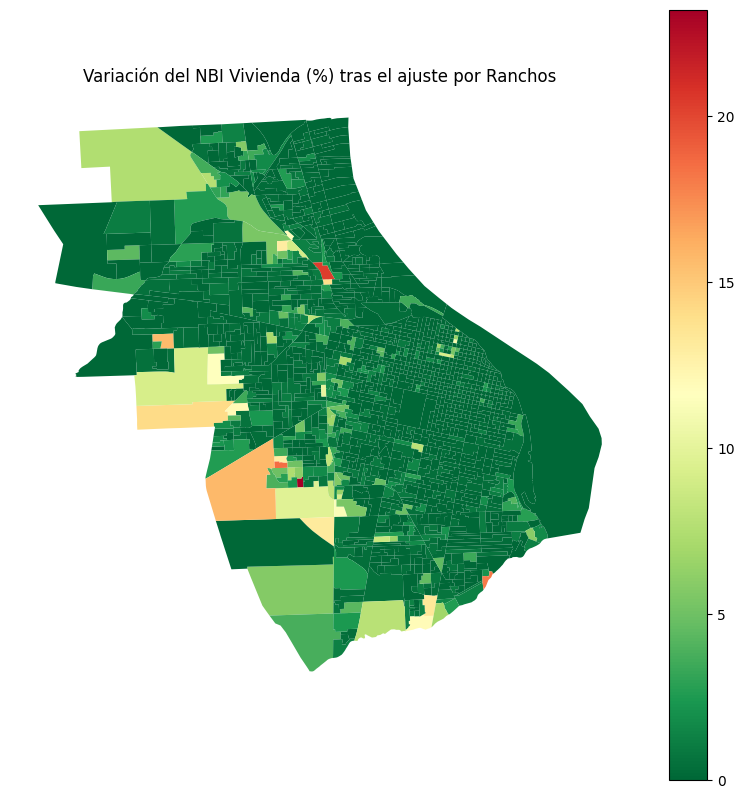

In [13]:
# Calculamos el delta (%) a nivel de radio censal
datos_censales_con_gdf['delta_NBI_vivienda_%'] = (
    datos_censales_con_gdf['tasa_NBI_vivienda_%_AJUSTADO'] -
    datos_censales_con_gdf['tasa_NBI_vivienda_%']
)

# Vemos los radios censales con mayor incremento su tasa de 'NBI_Vivienda' tras el ajuste
display(datos_censales_con_gdf[['CodigoRadioCensal','NBI_Vivienda_Si', 'viv_rancho','hogares_en_rancho','NBI_Vivienda_Si_AJUSTADO', 
                                'Total_Hogares','tasa_NBI_vivienda_%','tasa_NBI_vivienda_%_AJUSTADO', 'delta_NBI_vivienda_%']
        ].sort_values('delta_NBI_vivienda_%', ascending=False).head(25).style.highlight_between(subset=['delta_NBI_vivienda_%'],  right=datos_censales_con_gdf['delta_NBI_vivienda_%'].max(), color="#04285E" ))

# Graficamos en un mapa
fig, ax = plt.subplots(figsize=(10,10))
datos_censales_con_gdf.plot(
    column='delta_NBI_vivienda_%', cmap='RdYlGn_r', legend=True, ax=ax
)
plt.title("Variación del NBI Vivienda (%) tras el ajuste por Ranchos")
ax.axis('off')
plt.show()


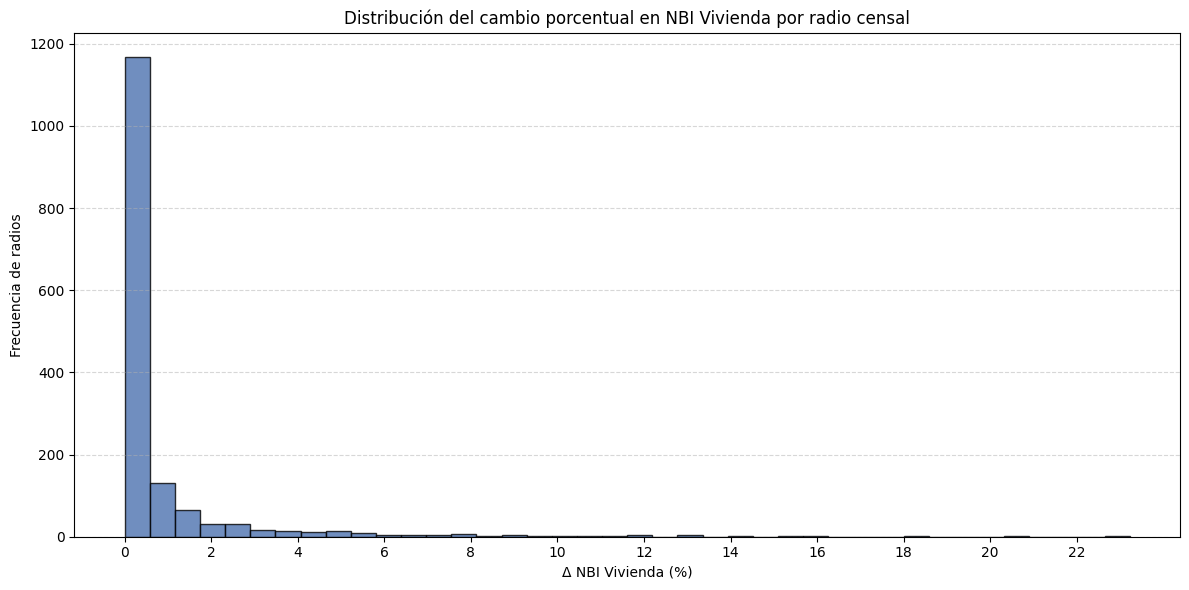

In [14]:
# Histograma del delta_NBI_vivienda_%
plt.figure(figsize=(12,6))  
plt.hist(datos_censales_con_gdf['delta_NBI_vivienda_%'], bins=40, color="#4C72B0", edgecolor='black', alpha=0.8)
plt.title("Distribución del cambio porcentual en NBI Vivienda por radio censal")
plt.xlabel("Δ NBI Vivienda (%)")
plt.ylabel("Frecuencia de radios")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregamos ticks personalizados en el eje x
min_x = datos_censales_con_gdf['delta_NBI_vivienda_%'].min()
max_x = datos_censales_con_gdf['delta_NBI_vivienda_%'].max()
plt.xticks(np.arange(round(min_x), round(max_x)+1, 2))

plt.tight_layout()
plt.show()

In [16]:
# Mostramos a modo de resumen los resultados obtenidos
resumen_nbi_vivienda = pd.DataFrame({
    "Total Hogares con NBI Vivienda (original)": [datos_censales_con_gdf['NBI_Vivienda_Si'].sum()],
    "Total Hogares tipo Rancho": [datos_censales_con_gdf['viv_rancho'].sum()],
    "Total Hogares NBI Vivienda (ajustado)": [datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO'].sum()],
    "Δ Hogares NBI Vivienda": [datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO'].sum() - datos_censales_con_gdf['NBI_Vivienda_Si'].sum()],
    "Δ % sobre total de hogares": [(datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO'].sum() - datos_censales_con_gdf['NBI_Vivienda_Si'].sum()) 
                                   / datos_censales_con_gdf['Total_Hogares'].sum() * 100]
})

resumen_nbi_vivienda

,Total Hogares con NBI Vivienda (original),Total Hogares tipo Rancho,Total Hogares NBI Vivienda (ajustado),Δ Hogares NBI Vivienda,Δ % sobre total de hogares
0,6597,3089,9793,3196,0.794857


>**Resumen del ajuste a NBI_Vivienda**


Tras el ajuste del indicador NBI Vivienda, incorporando las viviendas tipo Rancho bajo el supuesto de equivalencia vivienda–hogar, se observa un **aumento promedio del 0,8 %** en la tasa de hogares con NBI Vivienda a nivel de radio censal. Sin embargo, el impacto no es homogeneo a lo largo de la ciudad: mientras la mayoría de los radios presentan variaciones menores al 1 %, en radios censales del sudoeste de la ciudad el incremento toma valores cercanos al 20 %. 

Este resultado sugiere que la erronea clasificación censal original del tipo de vivienda condujo a una **subestimación del NBI Vivienda** por lo que el ajuste propuesto permite obtener una representación más fiel de las condiciones de precariedad habitacional en la ciudad.

-------------------------------------

#### Agregamos viviendas 'Casa tipio B' ???

Bajo los mismos supuestos, ahora agregamos las casas tipo B a el cálculo de 'NBI Vivienda'

Esto lo agregamos brevemente para ver los resultados, en caso de que sirva lo agregamos completo

In [17]:
# Recalculamos el TOTAL de hogares con NBI_Vivienda
datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO_con_casa_b'] = (
    datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO'] +
    datos_censales_con_gdf['hogares_en_casa_b']
)

# Calculamos la nueva tasa de NBI_Vivienda ajustado
datos_censales_con_gdf['tasa_NBI_vivienda_%_AJUSTADO_con_casa_b'] = (
    datos_censales_con_gdf['NBI_Vivienda_Si_AJUSTADO_con_casa_b'] /
    datos_censales_con_gdf['Total_Hogares'] * 100
)

In [20]:
# Vemos el mayor tasa_NBI_vivienda_% del ajuste con casas b, ademas vemos tasa_NBI_vivienda_% al lado
# Ademas extraemos la columna tasa_NBI_vivienda_% 

df_rancho_casa_b = datos_censales_con_gdf[['CodigoRadioCensal','Total_Hogares', 'NBI_Vivienda_Si', 'viv_rancho','viv_casa_b','hogares_en_casa_b','NBI_Vivienda_Si_AJUSTADO_con_casa_b', 
                                'tasa_NBI_vivienda_%','tasa_NBI_vivienda_%_AJUSTADO_con_casa_b']
        ].sort_values('tasa_NBI_vivienda_%_AJUSTADO_con_casa_b', ascending=False)

#Vemos las primeras 10 filas
df_rancho_casa_b.head(20)

,CodigoRadioCensal,Total_Hogares,NBI_Vivienda_Si,viv_rancho,viv_casa_b,hogares_en_casa_b,NBI_Vivienda_Si_AJUSTADO_con_casa_b,tasa_NBI_vivienda_%,tasa_NBI_vivienda_%_AJUSTADO_con_casa_b
1169,820844827,176,13,22,107,110,146,7.386364,82.954545
99,820844915,216,6,20,149,152,179,2.777778,82.870370
1166,820844824,310,43,30,165,165,243,13.870968,78.387097
277,820841020,423,25,36,257,265,328,5.910165,77.541371
98,820844914,310,30,69,131,133,235,9.677419,75.806452
1459,820848418,262,35,41,119,122,198,13.358779,75.572519
292,820841035,255,11,33,139,143,187,4.313725,73.333333
798,820843330,266,13,32,146,149,194,4.887218,72.932331
1131,820844719,410,38,12,236,245,298,9.268293,72.682927
849,820843517,310,8,21,191,196,225,2.580645,72.580645


In [21]:
# Vemos cuando vario tasa_NBI_vivienda_% al agregar casas b general en 
datos_censales_con_gdf['delta_NBI_vivienda_%_con_casa_b'] = (
    datos_censales_con_gdf['tasa_NBI_vivienda_%_AJUSTADO_con_casa_b'] -
    datos_censales_con_gdf['tasa_NBI_vivienda_%']
)

In [22]:
#Vemos los 10 mas altos
datos_censales_con_gdf['tasa_NBI_vivienda_%'].sort_values(ascending=False).head(10)

362     18.791946
1312    17.532468
623     15.300546
846     15.246637
1316    14.767932
848     14.678899
589     14.534884
1166    13.870968
1375    13.829787
503     13.372093
Name: tasa_NBI_vivienda_%, dtype: float64

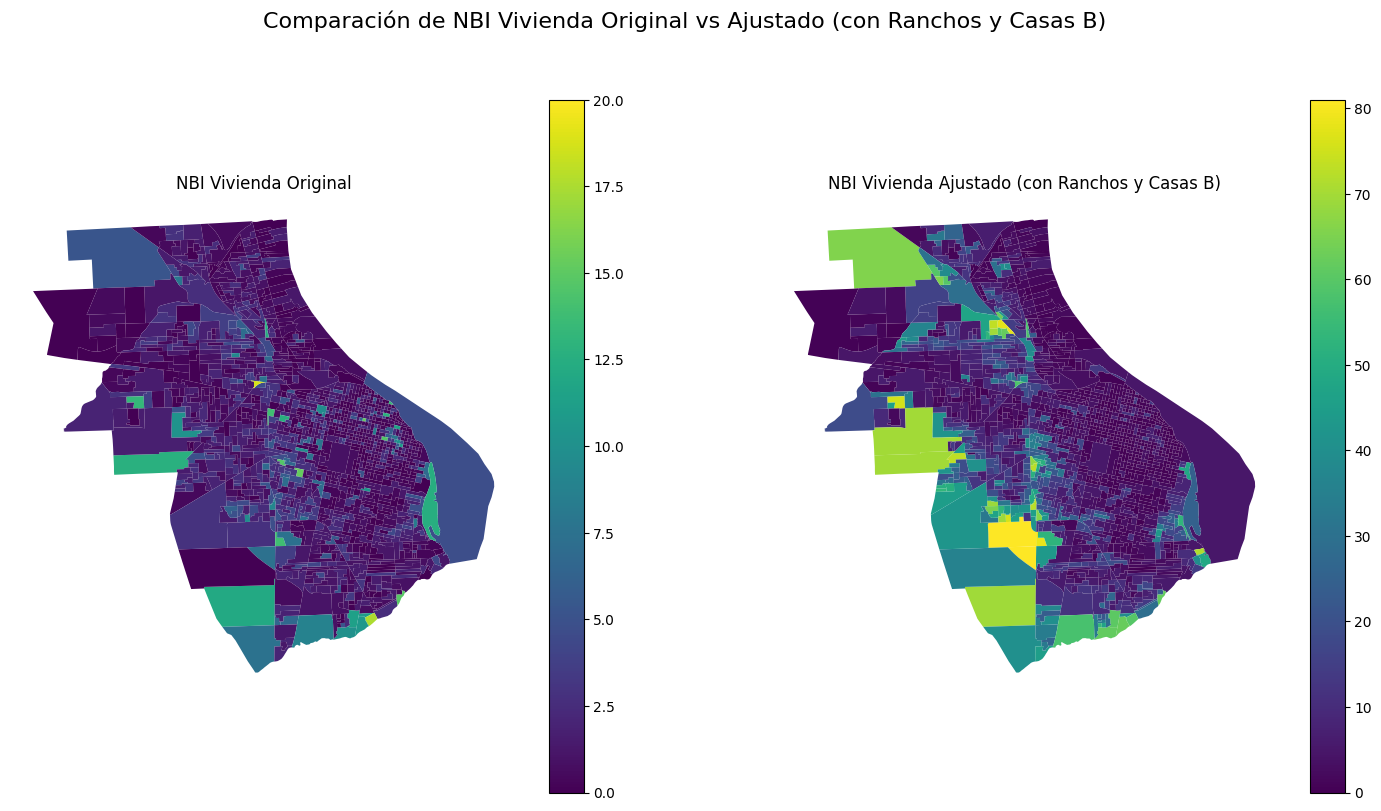

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))
plt.suptitle("Comparación de NBI Vivienda Original vs Ajustado (con Ranchos y Casas B)", fontsize=16)
datos_censales_con_gdf.plot(
    column='tasa_NBI_vivienda_%',
    cmap='viridis', legend=True, ax=axes[0],
    vmin=0, vmax=20
)
axes[0].set_title("NBI Vivienda Original")
axes[0].axis('off')

datos_censales_con_gdf.plot(
    column='tasa_NBI_vivienda_%_AJUSTADO_con_casa_b',
    cmap='viridis', legend=True, ax=axes[1],
    vmin=0, vmax=81.018519
)
axes[1].set_title("NBI Vivienda Ajustado (con Ranchos y Casas B)")
axes[1].axis('off')

plt.show()

In [83]:
# guardamos los datos actualizados (con NBI_Vivienda ajustado)
#datos_censales_con_gdf.to_file('../data/processed/datos_censales_con_gdf.gpkg', driver='GPKG')

------------------

## 2. Incidencia de Viviendas unipersonales

Los hogares unipersonales presentan una limitación dentro de la metodología del NBI, ya que, al componerse de una sola persona, quedan fuera de la mayoría de los criterios que definen las privaciones. En consecuencia, estos hogares rara vez son clasificados con Necesidades Básicas Insatisfechas, aun cuando puedan habitar en condiciones precarias o de vulnerabilidad. 

Los **hogares unipersonales** no presentarían ninguna de las siguientes privaciones contempladas en el NBI:

- NBI Hacinamiento: porque nunca habrá más de tres personas por cuarto.

- NBI Escolaridad: porque no hay niños en edad escolar dentro del hogar.

- NBI Capacidad de subsistencia: porque no existen personas dependientes del jefe del hogar, ya que se trata de un único individuo.

In [24]:
total_hogares_unipersonales = datos_censales_con_gdf['hogares_unipersonales'].sum()
print(total_hogares_unipersonales)

123858


123.858 hogares unipersonales en la ciudad de Rosario

In [25]:
total_hogares = datos_censales_con_gdf['Total_Hogares'].sum()
print(total_hogares)

402085


de 402.085 hogares totales

In [26]:
# Revisamos
datos_censales_con_gdf[['CodigoRadioCensal', 'hogares_unipersonales']].head()

,CodigoRadioCensal,hogares_unipersonales
0,820840301,60
1,820840302,39
2,820840303,50
3,820840304,97
4,820840305,62


In [27]:
# Veamos los radios censales con mayor cantidad de hogares unipersonales
top_hogares_unipersonales = datos_censales_con_gdf.sort_values(by='hogares_unipersonales', ascending=False).head(20)
top_hogares_unipersonales[['CodigoRadioCensal', 'hogares_unipersonales']]

,CodigoRadioCensal,hogares_unipersonales
557,820842409,339
583,820842512,265
466,820841903,257
534,820842312,254
464,820841901,254
21,820842003,253
444,820841805,247
529,820842307,242
446,820841807,242
518,820842212,239


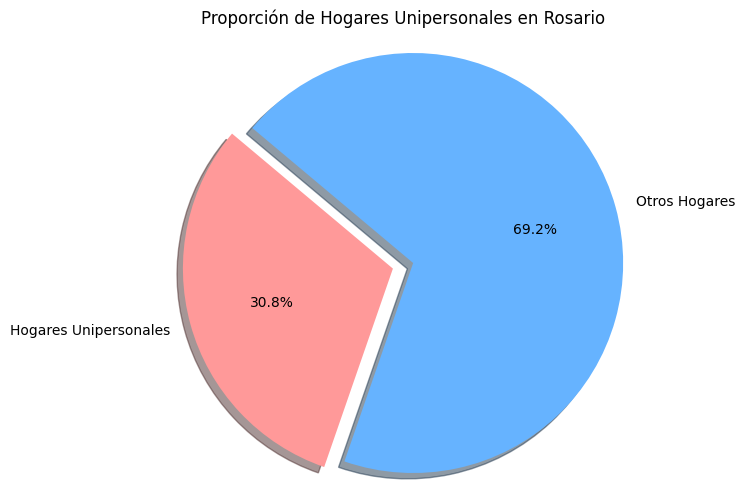

In [28]:
# Graficamos total de hogares unipersonales respecto al total de hogares en la ciudad
labels = ['Hogares Unipersonales', 'Otros Hogares']
sizes = [total_hogares_unipersonales, total_hogares - total_hogares_unipersonales]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # solo "explota" la primera porción
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proporción de Hogares Unipersonales en Rosario')
plt.axis('equal')  # Igual proporción para que el pie sea un círculo
plt.show()

In [29]:
datos_censales_con_gdf.columns

Index(['NOMPROV', 'PROV', 'NOMDEPTO', 'DEPTO', 'FRAC', 'RADIO', 'TIPO', 'LINK',
       'OBS2020', 'CodigoFraccion', 'CodigoRadioCensal', 'NBI_Hacinamiento_Si',
       'NBI_Hacinamiento_No', 'NBI_Vivienda_Si', 'NBI_Vivienda_No',
       'NBI_Sanitarias_Si', 'NBI_Sanitarias_No', 'NBI_Escolaridad_Si',
       'NBI_Escolaridad_No', 'NBI_Subsistencia_Si', 'NBI_Subsistencia_No',
       'NBI_Si', 'NBI_No', 'Sin_IPMH', 'IPMH_Solo_Recursos_Corrientes',
       'IPMH_Solo_Recursos_Patrimoniales', 'IPMH_Convergente', 'Total_Hogares',
       'Total_Poblacion', 'hogares_en_casa_a', 'hogares_en_casa_b',
       'hogares_en_rancho', 'hogares_en_casilla', 'hogares_en_departamento',
       'hogares_en_pieza_inquilinato', 'hogares_en_local_no_hab',
       'hogares_en_vivienda_movil', 'viv_casa_a', 'viv_casa_b', 'viv_rancho',
       'viv_casilla', 'viv_departamento', 'viv_pieza_inquilinato',
       'viv_local_no_hab', 'viv_vivienda_movil', 'Total_Viviendas',
       'tasa_NBI_%', 'NBI_Si_tasa_categorizado', '

In [30]:
# vemos 'tasa_NBI_%' ordenado de mayor a menor
datos_censales_con_gdf['tasa_NBI_%'].sort_values(ascending=False)

1272    64.285714
1316    34.177215
1222    29.368030
1166    28.709677
1312    28.354978
          ...    
962      0.000000
1279     0.000000
253      0.000000
1432     0.000000
234      0.000000
Name: tasa_NBI_%, Length: 1536, dtype: float64

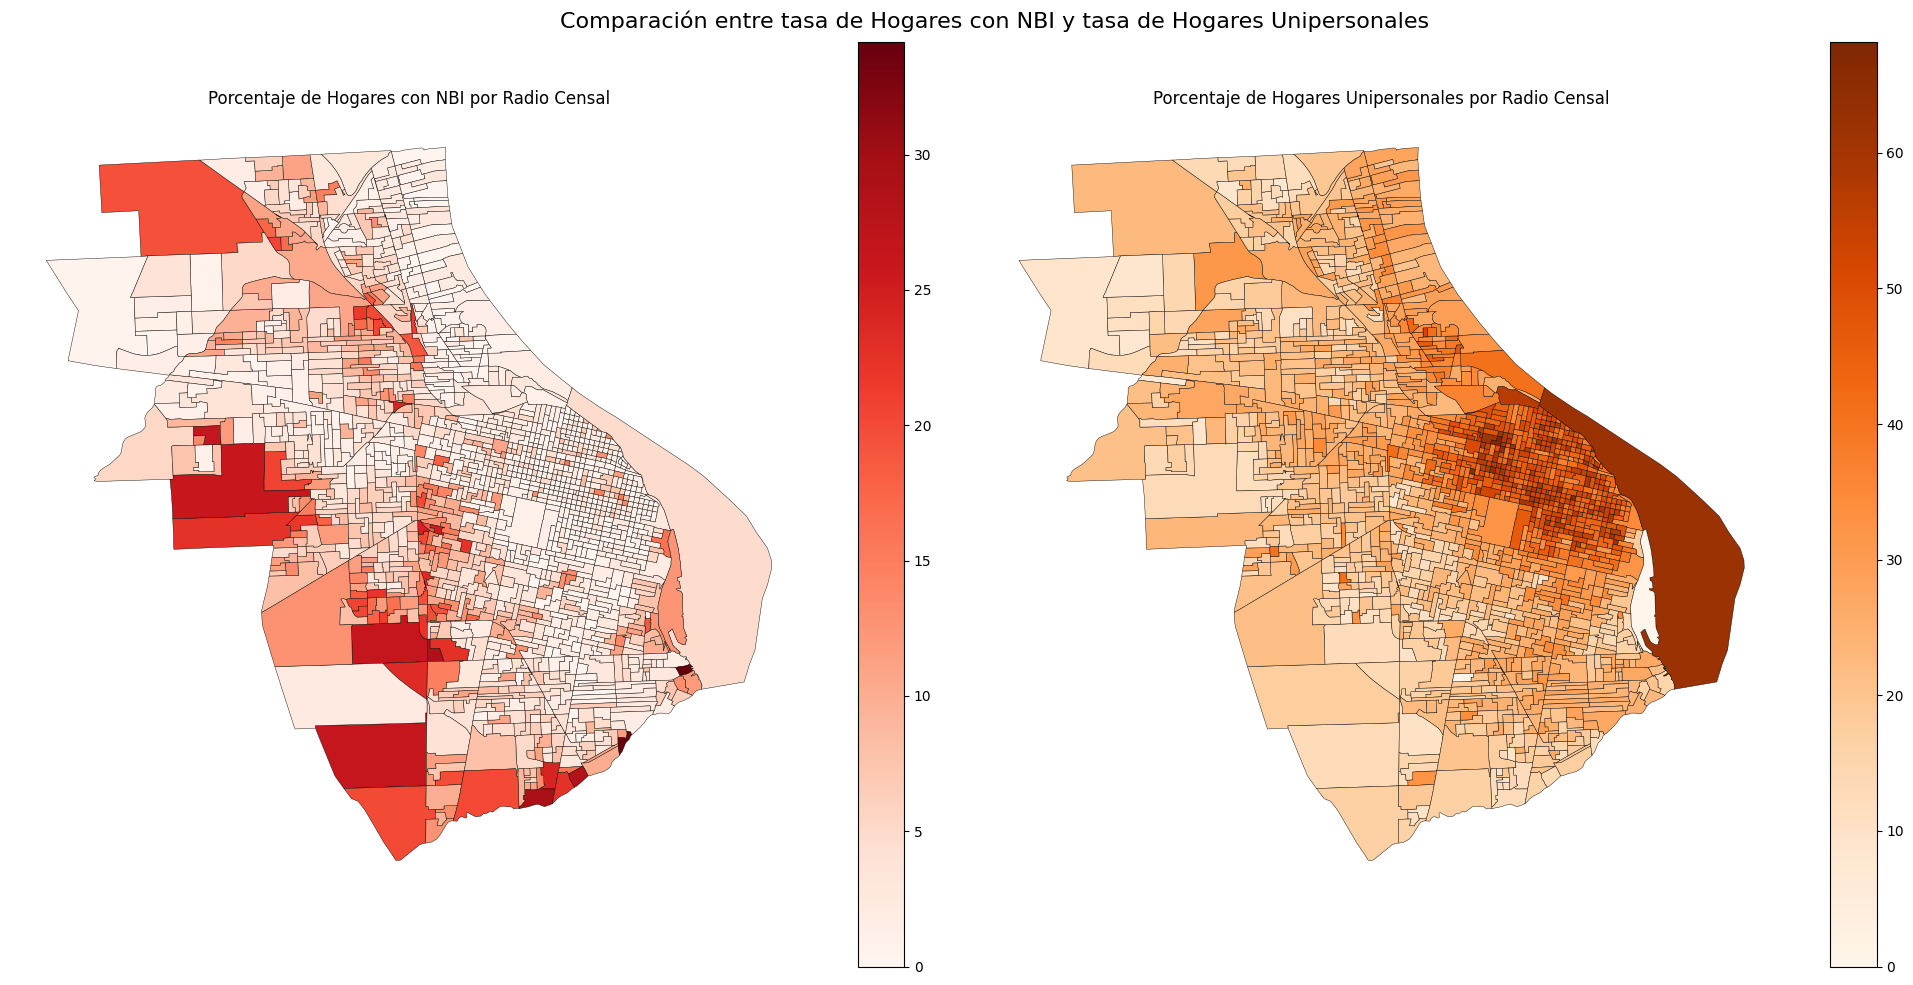

In [31]:
# Graficamos NBI y hogares unipersonales juntos
fig, axes = plt.subplots(1, 2, figsize=(20, 10))    
# Mapa NBI_Si (izquierda)
datos_censales_con_gdf.plot(
    column='tasa_NBI_%', 
    cmap='Reds', 
    legend=True, 
    edgecolor='black', 
    linewidth=0.3, 
    ax=axes[0],
    vmin=0,
    vmax=34.177215
    )
axes[0].set_title("Porcentaje de Hogares con NBI por Radio Censal")
axes[0].axis('off') 


# Mapa Hogares Unipersonales (derecha)
datos_censales_con_gdf.plot(
    column='tasa_hogares_unipersonales_%', 
    cmap='Oranges', 
    legend=True, 
    edgecolor='black', 
    linewidth=0.3, 
    ax=axes[1]
)
axes[1].set_title("Porcentaje de Hogares Unipersonales por Radio Censal")
axes[1].axis('off')

plt.suptitle("Comparación entre tasa de Hogares con NBI y tasa de Hogares Unipersonales", fontsize=16)
plt.tight_layout()
plt.show()

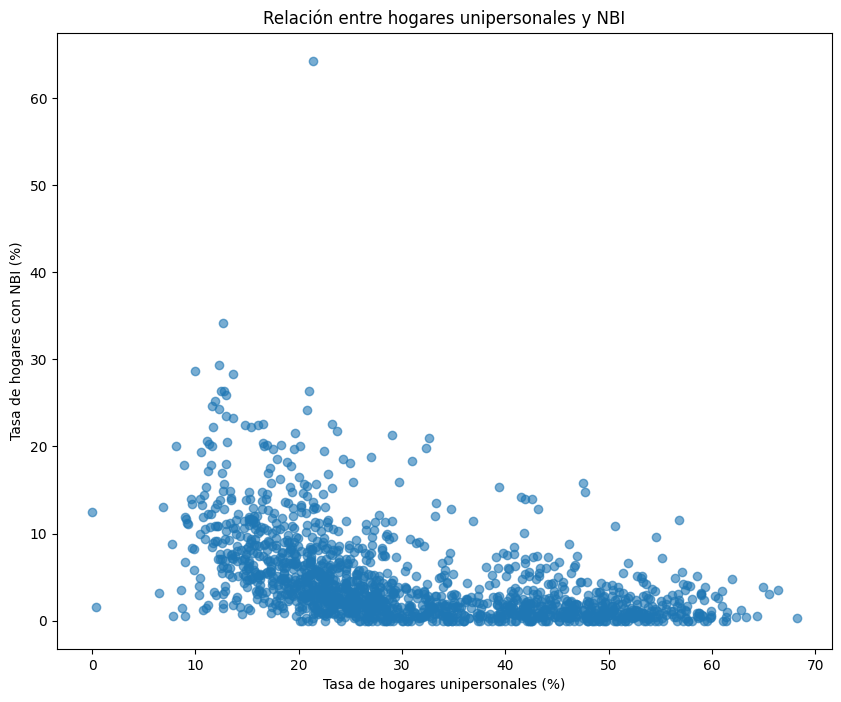

In [33]:
# Graficamos el scatter plot 
plt.figure(figsize=(10,8))
plt.scatter(datos_censales_con_gdf['tasa_hogares_unipersonales_%'], 
            datos_censales_con_gdf['tasa_NBI_%'], alpha=0.6)
plt.xlabel('Tasa de hogares unipersonales (%)')
plt.ylabel('Tasa de hogares con NBI (%)')
plt.title('Relación entre hogares unipersonales y NBI')
plt.show()

Estudiamos correlacion entre 'Tasa de Hogares unipersonales' y los demas indicadores de NBI.

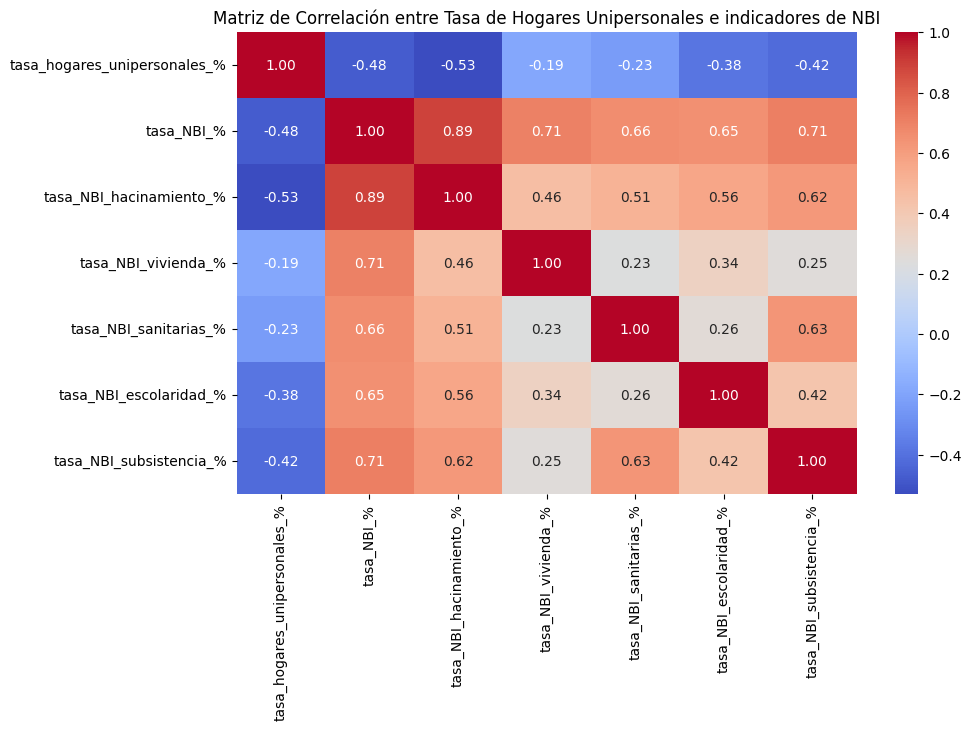

In [35]:
# Vemos correlacion entre Tasa de Hogares unipersonales y los demas indicadores de NBI.
correlaciones = datos_censales_con_gdf[['tasa_hogares_unipersonales_%',
                                        'tasa_NBI_%',
                                        'tasa_NBI_hacinamiento_%',
                                        'tasa_NBI_vivienda_%',
                                        'tasa_NBI_sanitarias_%',
                                        'tasa_NBI_escolaridad_%',
                                        'tasa_NBI_subsistencia_%']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Tasa de Hogares Unipersonales e indicadores de NBI')
plt.show()

Vemos que los **hogares unipersonales** presentan correlaciones negativas con todas las dimensiones del NBI, en especial con:

- NBI por hacinamiento (-0.53)

- NBI por subsistencia (-0.42)

- NBI por escolaridad (-0.38)

Esto nos muestra que los radios censales con mayor cantidad de hogares unipersonales tienden a tener menores tasas de NBI. Aunque se observa una correlacion inversa negativa (r = -0.37) con el NBI total, lo que implica que a medida que aumenta la presencia de hogares unipersonales en un radio censal, disminuye la incidendia de privaciones según la metodología de NBI. Sin embargo, este resultado debe tomarse con precaución, la estructura unipersonal de estos hogares los excluye de varios criterios del indicador (hacinamiento, subsistencia, escolaridad), generando un sesgo que subestima la vulnerabilidad real. 
Por lo tanto, la baja correlación podría reflejar una limitación metodológica del NBI mas que una mejora en las condiciones de vida de los hogares unipersonales.

----------------

Dividimos los radios censales en cuartiles según su proporción de hogares unipersonales.

In [36]:
# Clasificamos los radios según su nivel de hogares unipersonales (cuartiles)
datos_censales_con_gdf['tasa_hogares_unipersonales_%'].describe()

count    1536.000000
mean       30.876301
std        13.557123
min         0.000000
25%        20.602476
50%        27.060868
75%        42.233677
max        68.209877
Name: tasa_hogares_unipersonales_%, dtype: float64

In [37]:
# Dividimos en cuartiles
datos_censales_con_gdf['cuartil_unip'] = pd.qcut(
    datos_censales_con_gdf['tasa_hogares_unipersonales_%'], 4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
)

In [38]:
# Calculamos el NBI promedio por cuartil de hogares unipersonales
nbi_por_grupo = datos_censales_con_gdf.groupby('cuartil_unip')['tasa_NBI_%'].mean().reset_index()
display(nbi_por_grupo)
# Ademas lo hacemos por cada uno de los 5 indicadores de NBI
nbi_detallado_por_grupo = datos_censales_con_gdf.groupby('cuartil_unip')[[
    'tasa_NBI_hacinamiento_%',
    'tasa_NBI_vivienda_%',
    'tasa_NBI_sanitarias_%',
    'tasa_NBI_escolaridad_%',
    'tasa_NBI_subsistencia_%'
]].mean().reset_index()
display(nbi_detallado_por_grupo)    

/tmp/ipykernel_84426/2011771990.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nbi_por_grupo = datos_censales_con_gdf.groupby('cuartil_unip')['tasa_NBI_%'].mean().reset_index()


,cuartil_unip,tasa_NBI_%
0,Bajo,8.818391
1,Medio-Bajo,4.831686
2,Medio-Alto,2.839451
3,Alto,1.901938


/tmp/ipykernel_84426/2011771990.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nbi_detallado_por_grupo = datos_censales_con_gdf.groupby('cuartil_unip')[[


,cuartil_unip,tasa_NBI_hacinamiento_%,tasa_NBI_vivienda_%,tasa_NBI_sanitarias_%,tasa_NBI_escolaridad_%,tasa_NBI_subsistencia_%
0,Bajo,4.186600,2.352781,0.993832,1.417269,0.871549
1,Medio-Bajo,1.943325,1.644457,0.585350,0.706487,0.458701
2,Medio-Alto,0.880379,1.287425,0.246119,0.475866,0.191424
3,Alto,0.360967,1.205711,0.061075,0.309684,0.058566


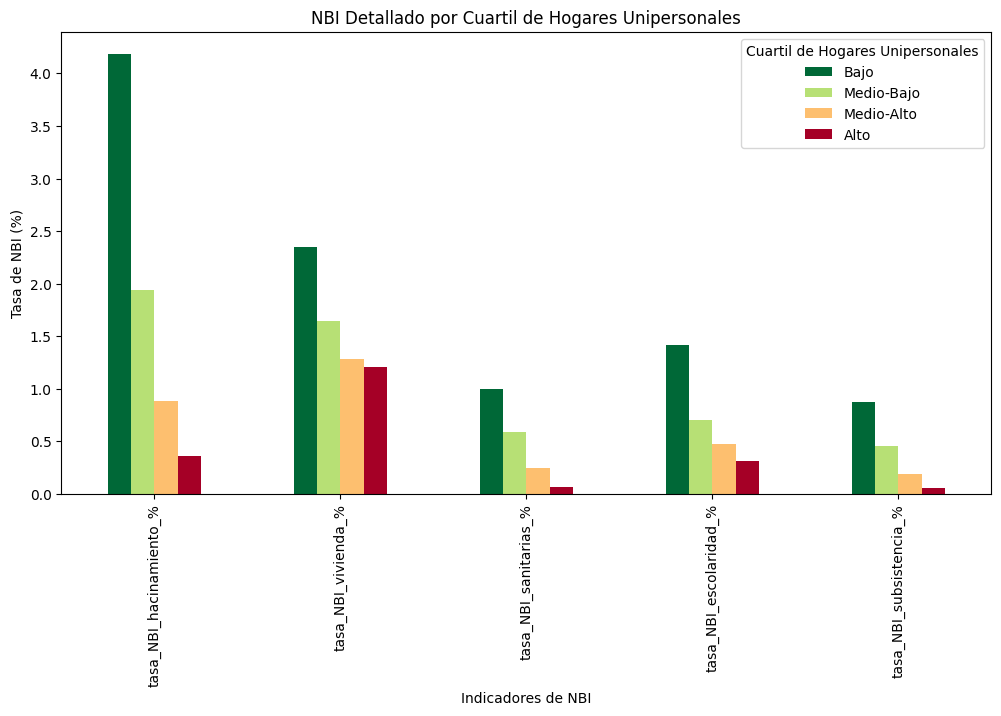

In [39]:
# Graficamos nbi_detallado_por_grupo
plt.figure(figsize=(12, 6))
nbi_detallado_por_grupo.set_index('cuartil_unip').T.plot(kind='bar', stacked=False, colormap='RdYlGn_r', ax=plt.gca())
plt.title('NBI Detallado por Cuartil de Hogares Unipersonales')
plt.xlabel('Indicadores de NBI')
plt.ylabel('Tasa de NBI (%)')
plt.legend(title='Cuartil de Hogares Unipersonales')
plt.show()

Podemos agregar lo de análisis de MORAN BIVARIADO

In [101]:
# ---- MORAN BIVARIADO CON MAPA LISA

## 3. Hogares con no mas de 3 personas para NBI Hacinamiento


**NBI Hacinamiento:** es la relación entre la cantidad total de miembros del hogar y la cantidad de habitaciones de uso exclusivo del hogar. Operacionalmente se considera que existe hacinamiento crítico cuando en el hogar hay más de tres personas por cuarto

Por lo tanto si no habitan mas de 3 personas en el hogar, nunca podran tener -- NBI Hacinamiento --

In [40]:
datos_total_población = pd.read_csv("../data/raw/poblacion_por_radio_censal.csv")

In [41]:
datos_total_población.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CodigoRadioCensal  1537 non-null   int64
 1   1                  1537 non-null   int64
 2   2                  1537 non-null   int64
 3   3                  1537 non-null   int64
 4   4                  1537 non-null   int64
 5   5                  1537 non-null   int64
 6   6                  1537 non-null   int64
 7   7                  1537 non-null   int64
 8   8                  1537 non-null   int64
 9   9                  1537 non-null   int64
 10  10                 1537 non-null   int64
 11  11                 1537 non-null   int64
 12  12                 1537 non-null   int64
 13  13                 1537 non-null   int64
 14  14                 1537 non-null   int64
 15  15                 1537 non-null   int64
 16  16                 1537 non-null   int64
 17  17            

In [42]:
# Creamos una nueva variables de hogares con 3 o menos personas
datos_total_población["hogares_menos_3_personas"] = (
    datos_total_población["1"]+ #Hogares unipersonales
    datos_total_población["2"]+ #Hogares de 2 personas
    datos_total_población["3"]  #Hogares de 3 personas
)

In [43]:
# En el total de hogares
datos_total_población['hogares_menos_3_personas'].describe()

count    1537.000000
mean      193.383865
std        66.925028
min         1.000000
25%       146.000000
50%       183.000000
75%       234.000000
max       540.000000
Name: hogares_menos_3_personas, dtype: float64

In [44]:
datos_total_población.head()

,CodigoRadioCensal,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Total,hogares_menos_3_personas
0,820840301,60,50,51,58,36,5,6,1,0,...,0,0,0,0,0,0,0,0,267,161
1,820840302,39,58,65,67,43,7,4,1,1,...,0,0,0,0,0,0,0,0,285,162
2,820840303,50,47,47,53,30,6,4,2,1,...,0,0,0,0,0,0,0,0,240,144
3,820840304,97,81,107,77,54,14,5,3,0,...,0,0,0,1,0,0,0,0,439,285
4,820840305,62,60,50,41,25,4,0,1,0,...,0,0,0,0,0,0,0,0,243,172


In [45]:
# Hacemos un merge con datos_censales_con_gdf para tener toda la información junta
datos_censales_con_gdf_aux = datos_censales_con_gdf.merge(
    datos_total_población[["CodigoRadioCensal", "hogares_menos_3_personas"]],
    on="CodigoRadioCensal", how="left"
)

In [46]:
# Calculamos la tasa de hogares con 3 o menos personas
datos_censales_con_gdf_aux['tasa_hogares_menos_3_personas_%'] = (
    datos_censales_con_gdf_aux['hogares_menos_3_personas'] /
    datos_censales_con_gdf_aux['Total_Hogares'] * 100
)

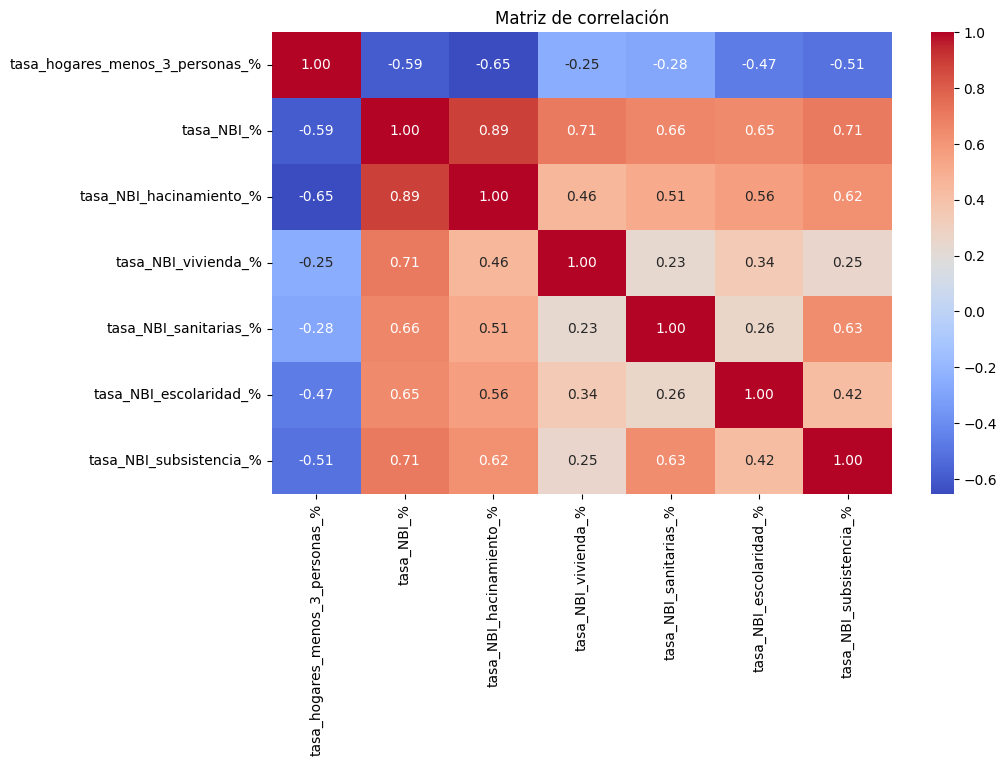

In [47]:
# Chequeamos correlacion entre 'NBI_Hacinamiento_Si' 'NBI_Hacinamiento_No' y 'menos_3_personas'
# Graficamos la matriz de correlacion

correlation_matrix = datos_censales_con_gdf_aux[[
'tasa_hogares_menos_3_personas_%',
'tasa_NBI_%',
'tasa_NBI_hacinamiento_%',
'tasa_NBI_vivienda_%',
'tasa_NBI_sanitarias_%',
'tasa_NBI_escolaridad_%',
'tasa_NBI_subsistencia_%']].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [48]:
correlation_matrix

,tasa_hogares_menos_3_personas_%,tasa_NBI_%,tasa_NBI_hacinamiento_%,tasa_NBI_vivienda_%,tasa_NBI_sanitarias_%,tasa_NBI_escolaridad_%,tasa_NBI_subsistencia_%
tasa_hogares_menos_3_personas_%,1.000000,-0.589521,-0.653723,-0.252892,-0.279348,-0.466592,-0.510497
tasa_NBI_%,-0.589521,1.000000,0.886564,0.705194,0.661611,0.648494,0.707513
tasa_NBI_hacinamiento_%,-0.653723,0.886564,1.000000,0.456564,0.510090,0.564014,0.622617
tasa_NBI_vivienda_%,-0.252892,0.705194,0.456564,1.000000,0.232859,0.342509,0.251466
tasa_NBI_sanitarias_%,-0.279348,0.661611,0.510090,0.232859,1.000000,0.258999,0.634379
tasa_NBI_escolaridad_%,-0.466592,0.648494,0.564014,0.342509,0.258999,1.000000,0.419921
tasa_NBI_subsistencia_%,-0.510497,0.707513,0.622617,0.251466,0.634379,0.419921,1.000000


NBI Hacinamiento: r = -0.65, la relación más fuerte. Es lógico: hogares pequeños nunca cumplen la condición de “más de 3 personas por cuarto”.

-----